<a href="https://colab.research.google.com/github/jidatix/fraud-detection-project/blob/main/ds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
data=pd.read_csv("/content/creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [5]:
data = data.drop_duplicates()
data =data.dropna()

In [6]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41677,40781,1.059978,0.041244,0.382701,1.250712,-0.311883,-0.366149,0.050150,-0.023937,0.100562,...,0.093891,0.172183,-0.095805,0.051263,0.493764,-0.303730,0.022556,0.030893,69.12,0.0
41678,40781,-0.447381,1.134089,0.534095,-0.192366,1.344408,-0.370402,1.088646,-0.094025,-0.444502,...,-0.050234,-0.092340,-0.463501,-0.908485,0.202750,-0.506844,-0.058317,-0.085094,1.00,0.0
41679,40782,1.133168,0.406826,0.956032,2.315761,-0.242409,0.225013,-0.295703,0.130832,-0.768433,...,0.180411,0.487918,-0.121882,0.029950,0.465114,0.097369,0.010912,0.018509,10.65,0.0
41680,40783,-0.536190,1.355132,0.064049,0.884589,0.581654,-0.179437,0.466058,0.213312,-0.130088,...,-0.013520,0.198903,-0.112066,-0.505780,-0.266556,-0.349786,-0.367509,-0.399716,1.00,0.0


In [7]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Class distribution before SMOTE:
 Class
0.0    41393
1.0      108
Name: count, dtype: int64


/tmp/ipython-input-282434333.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="pastel")


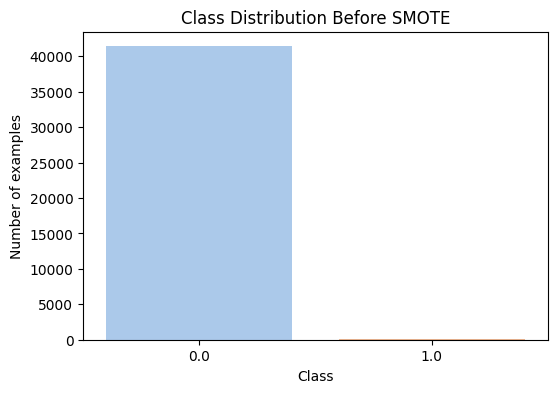

In [14]:

class_counts = y.value_counts()
print("Class distribution before SMOTE:\n", class_counts)
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="pastel")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Number of examples")
plt.show()

data imbalance >> SMOTE

In [17]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

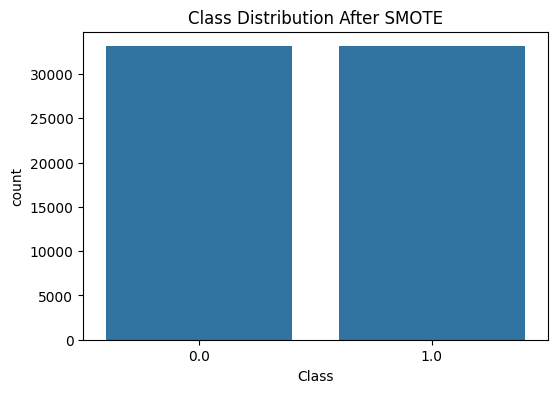

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=y_train_sm)
plt.title("Class Distribution After SMOTE")
plt.show()


logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=2000)

In [21]:
y_pred_log = log_model.predict(X_test)

print("==== Logistic Regression ====")
print(classification_report(y_test, y_pred_log))

==== Logistic Regression ====
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      8277
         1.0       0.12      0.96      0.22        24

    accuracy                           0.98      8301
   macro avg       0.56      0.97      0.60      8301
weighted avg       1.00      0.98      0.99      8301



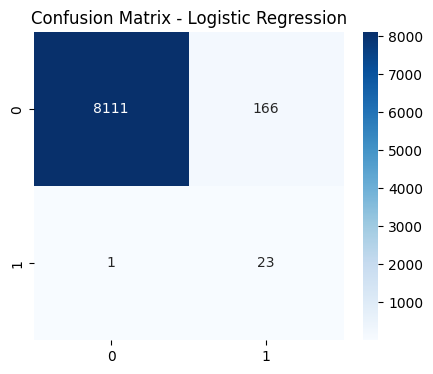

In [22]:
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


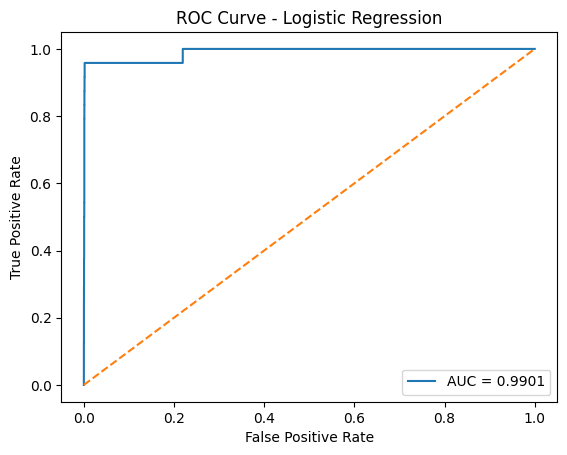

In [23]:
y_prob_log = log_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

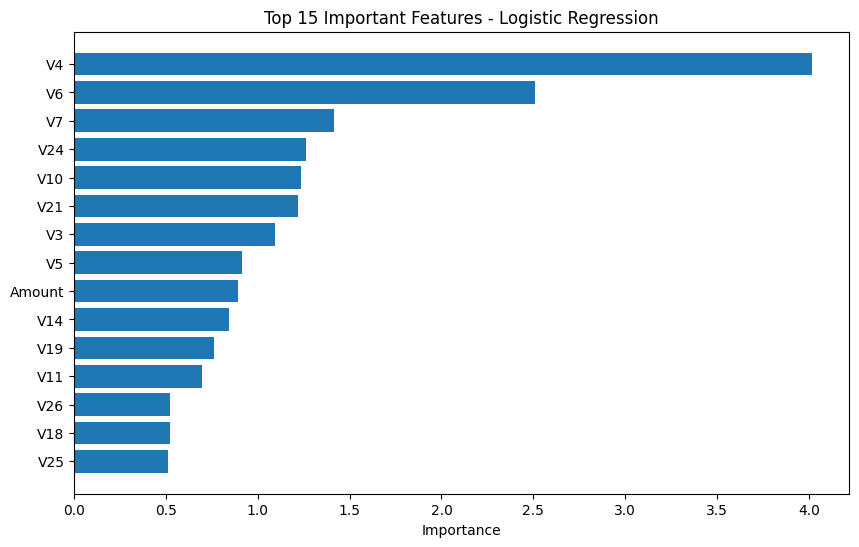

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fit model
log_model.fit(X_train_sm, y_train_sm)

# Get feature importance (coefficients)
importance = np.abs(log_model.coef_[0])
feature_names = X.columns # Corrected: Get column names from the original X DataFrame

# Create a dataframe
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'][:15], fi_df['Importance'][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features - Logistic Regression")
plt.xlabel("Importance")
plt.show()

Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train_sm, y_train_sm)
y_pred_rf = rf_model.predict(X_test)


==== Random Forest ====
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8277
         1.0       0.85      0.92      0.88        24

    accuracy                           1.00      8301
   macro avg       0.92      0.96      0.94      8301
weighted avg       1.00      1.00      1.00      8301



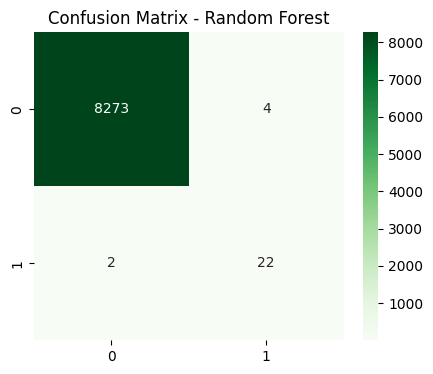

In [27]:
print("==== Random Forest ====")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

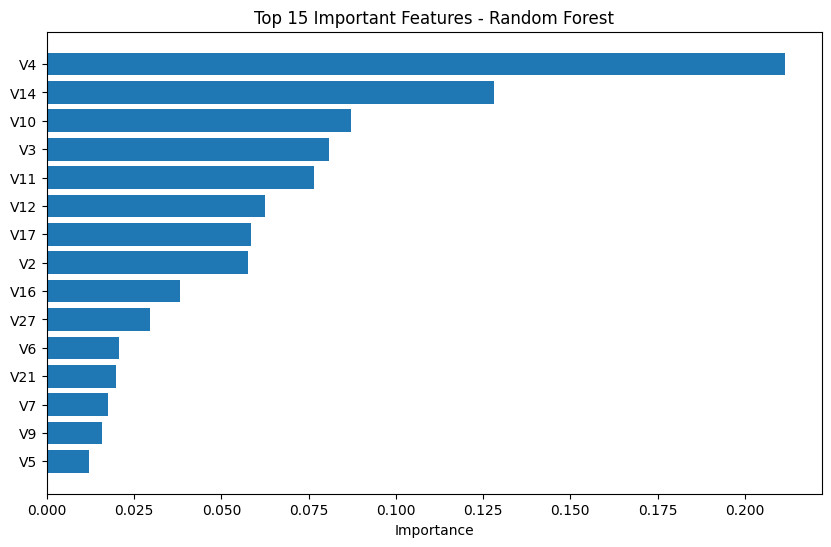

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train_sm, y_train_sm)

importances = rf.feature_importances_
fi_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(fi_rf['Feature'][:15], fi_rf['Importance'][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Importance")
plt.show()


Neural Network

Build Model (Experiment 1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


In [30]:
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train_sm.shape[1], activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Classification (binary)

nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',   # نراقب الـ validation loss
    patience=5,           #بعد 5 epochs لو الموديل ما اتحسنش بنوقف
    restore_best_weights=True
)

In [32]:
history = nn_model.fit(
    X_train_sm, y_train_sm,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9582 - loss: 0.1192 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 2/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9983 - loss: 0.0117 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 3/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9991 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 4/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 5/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 9.5812e-04
Epoch 6/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 4.7984e-04
Epoch 7/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 2.2185e-04
Epoch 8/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9995 - los

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
==== Neural Network ====
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8277
         1.0       0.71      0.83      0.77        24

    accuracy                           1.00      8301
   macro avg       0.86      0.92      0.88      8301
weighted avg       1.00      1.00      1.00      8301



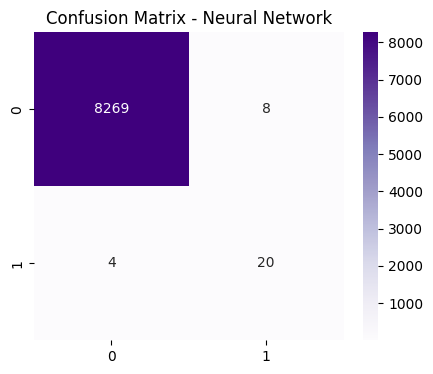

In [33]:
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)

print("==== Neural Network ====")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Neural Network")
plt.show()

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


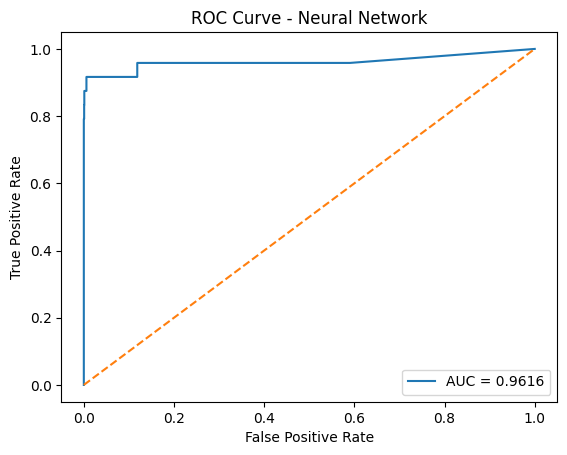

In [34]:
y_prob_nn = nn_model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob_nn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.show()

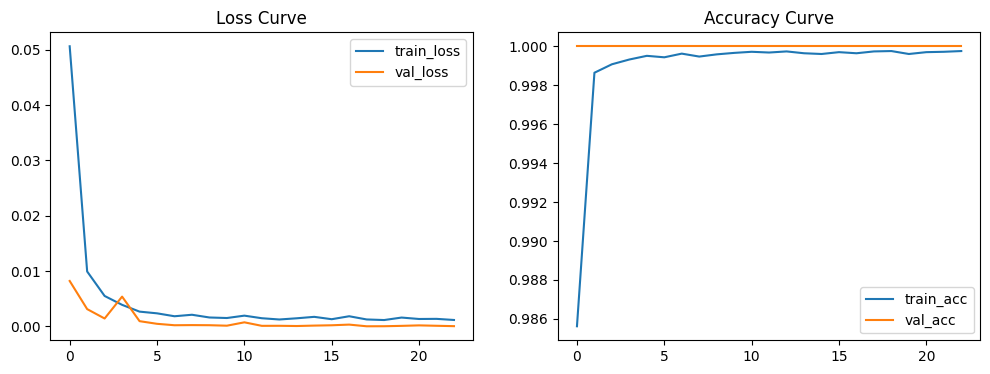

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

Build Model - Experiment 2

In [36]:
nn_model2 = Sequential()
nn_model2.add(Dense(64, input_dim=X_train_sm.shape[1], activation='relu'))
nn_model2.add(Dropout(0.3))
nn_model2.add(Dense(32, activation='relu'))
nn_model2.add(Dense(16, activation='relu'))
nn_model2.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#compiel& fit
nn_model2.compile(optimizer=RMSprop(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history2 = nn_model2.fit(
    X_train_sm, y_train_sm,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9519 - loss: 0.1380 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 2/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9978 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss: 6.0583e-04
Epoch 3/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9986 - loss: 0.0130 - val_accuracy: 1.0000 - val_loss: 3.0313e-04
Epoch 4/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9990 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 1.2938e-04
Epoch 5/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9992 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 1.6347e-04
Epoch 6/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9991 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 7.6054e-05
Epoch 7/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9992 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 1.5454e-04
Epoch 8/50
1656/1656 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 

In [38]:
y_pred2 = (nn_model2.predict(X_test) > 0.5).astype(int)

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
print("==== Neural Network Experiment 2 ====")
print(classification_report(y_test, y_pred2))

==== Neural Network Experiment 2 ====
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8277
         1.0       0.70      0.88      0.78        24

    accuracy                           1.00      8301
   macro avg       0.85      0.94      0.89      8301
weighted avg       1.00      1.00      1.00      8301



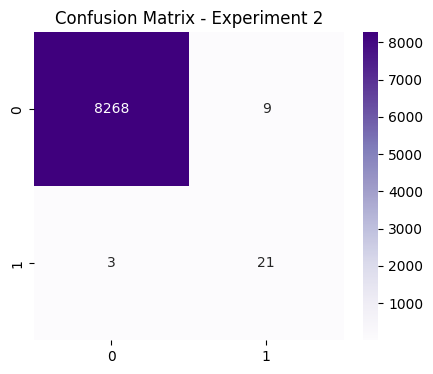

In [40]:
#confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Experiment 2")
plt.show()

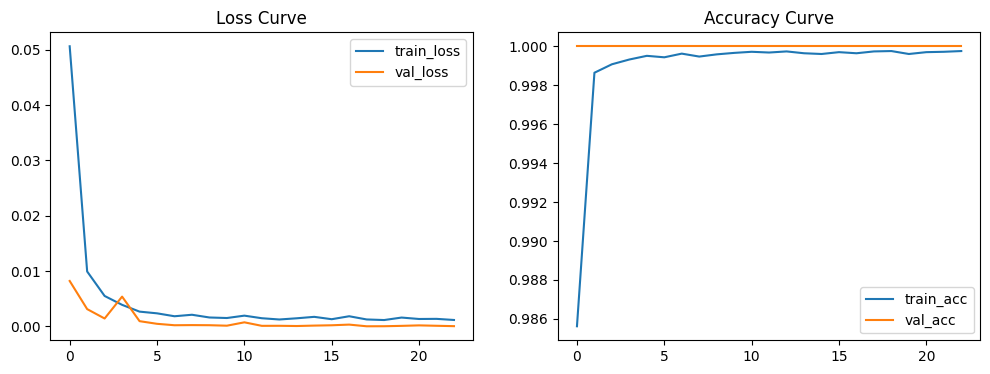

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

Build Model - Experiment 3

In [42]:
nn_model3 = Sequential()
nn_model3.add(Dense(128, input_dim=X_train_sm.shape[1], activation='relu'))
nn_model3.add(Dropout(0.3))
nn_model3.add(Dense(64, activation='relu'))
nn_model3.add(Dense(1, activation='sigmoid'))

# Compile &fit
nn_model3.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history3 = nn_model3.fit(
    X_train_sm, y_train_sm,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9787 - loss: 0.0587 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 2/50
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9989 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 3/50
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9991 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 8.9089e-04
Epoch 4/50
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9990 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 5.0160e-04
Epoch 5/50
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9990 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 3.5122e-04
Epoch 6/50
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9991 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 4.2351e-04
Epoch 7/50
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9994 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 8/50
3312/3312 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9995

In [43]:
y_pred3 = (nn_model3.predict(X_test) > 0.5).astype(int)

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


==== Neural Network Experiment 3 ====
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8277
         1.0       0.61      0.96      0.74        24

    accuracy                           1.00      8301
   macro avg       0.80      0.98      0.87      8301
weighted avg       1.00      1.00      1.00      8301



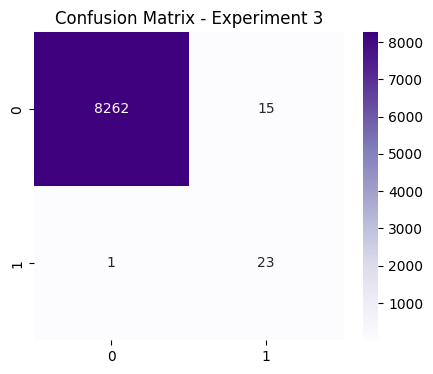

In [44]:
print("==== Neural Network Experiment 3 ====")
print(classification_report(y_test, y_pred3))

# Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(5,4))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Experiment 3")
plt.show()

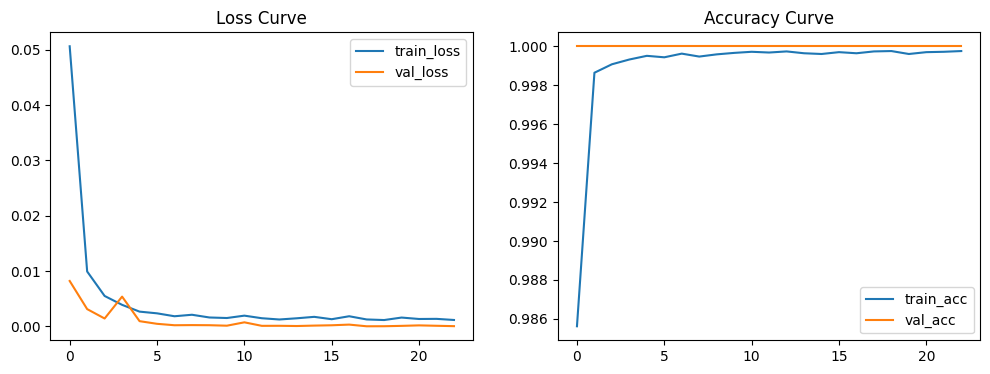

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy Curve')
plt.legend()
plt.show()